In [1]:
import pandas as pd

path = "MSFT.csv"

Mengimpor library pandas 

In [2]:
df = pd.read_csv(path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
1,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
2,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
3,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
4,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.059444,58435200


Menampilkan data dari baris pertama

In [3]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-14,0.100694
1,1986-03-17,0.102431
2,1986-03-18,0.099826
3,1986-03-19,0.098090
4,1986-03-20,0.095486
...,...,...
9075,2022-03-16,294.390015
9076,2022-03-17,295.220001
9077,2022-03-18,300.429993
9078,2022-03-21,299.160004


Hanya menampilkan kolom date dan close saja dari data awal dan data terakhir

In [4]:
df['Date']

0       1986-03-14
1       1986-03-17
2       1986-03-18
3       1986-03-19
4       1986-03-20
           ...    
9075    2022-03-16
9076    2022-03-17
9077    2022-03-18
9078    2022-03-21
9079    2022-03-22
Name: Date, Length: 9080, dtype: object

Menampilkan informasi dalam kolom Date

In [5]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

Dalam contoh ini, string '1986-03-19' diubah menjadi objek datetime dengan nilai tahun 1986, bulan Maret (nilai 3), dan hari 19. Hasilnya adalah objek datetime yang sesuai dengan tanggal yang diberikan.

In [6]:
df

,Date,Close
0,1986-03-14,0.100694
1,1986-03-17,0.102431
2,1986-03-18,0.099826
3,1986-03-19,0.098090
4,1986-03-20,0.095486
...,...,...
9075,2022-03-16,294.390015
9076,2022-03-17,295.220001
9077,2022-03-18,300.429993
9078,2022-03-21,299.160004


In [7]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      1986-03-14
1      1986-03-17
2      1986-03-18
3      1986-03-19
4      1986-03-20
          ...    
9075   2022-03-16
9076   2022-03-17
9077   2022-03-18
9078   2022-03-21
9079   2022-03-22
Name: Date, Length: 9080, dtype: datetime64[ns]

Pada kode ini penggunaan fungsi str_to_datetime untuk mengkonversi kolom 'Date' dalam DataFrame df menjadi objek datetime. Setelah konversi dilakukan, kolom 'Date' akan berisi objek datetime yang dapat digunakan untuk operasi berbasis tanggal dan waktu.

In [8]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
1986-03-20,0.095486
...,...
2022-03-16,294.390015
2022-03-17,295.220001
2022-03-18,300.429993


df.pop('Date') akan menghapus kolom 'Date' dari DataFrame df dan mengembalikan kolom tersebut sebagai objek terpisah. Kemudian, df.index = ... digunakan untuk mengubah indeks dari DataFrame menjadi hasil yang dikembalikan oleh df.pop('Date'). Dengan demikian, kolom 'Date' dihapus dari struktur DataFrame dan digunakan sebagai indeks.

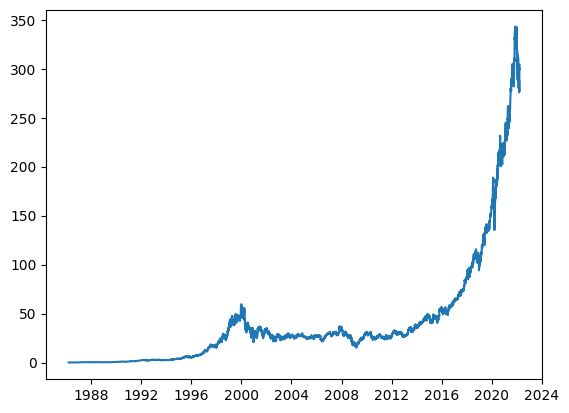

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

Harga tutup saham dari tahun 1986 sampai 2022

In [10]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-22', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
246,2022-03-16,280.070007,276.440002,287.149994,294.390015
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004


Mengambil data dari tanggal 2021-03-25 sampai 2022-03-22. Di mana dalam kolom Target digunakan sebagai output dan Target -3, -2, dan -1 adalah inputnya sebagai supervised learning problem.

In [11]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((251,), (251, 3, 1), (251,))

Dalam kode baris ini digunakan untuk mengubah DataFrame yang sudah di-windowing menjadi array NumPy yang sesuai untuk digunakan dalam pemodelan analisis data berurutan.


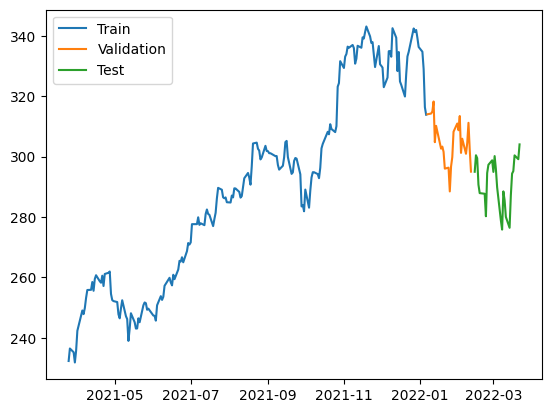

In [12]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

Pemisahan data menjadi set pelatihan (training set), set validasi (validation set), dan set pengujian (test set) untuk analisis data berurutan. Di mana 80% adalah data training, 80%-90% adalah data validation, dan 90%-100% adalah data testing. 

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 86ms/step - loss: 84423.2109 - mean_absolute_error: 288.8067 - val_loss: 92587.5703 - val_mean_absolute_error: 304.1952
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 84111.8828 - mean_absolute_error: 288.2712 - val_loss: 92264.3672 - val_mean_absolute_error: 303.6635
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 83774.7812 - mean_absolute_error: 287.6867 - val_loss: 91838.9062 - val_mean_absolute_error: 302.9621
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 83323.2422 - mean_absolute_error: 286.8996 - val_loss: 91277.3594 - val_mean_absolute_error: 302.0339
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 82723.7656 - mean_absolute_error: 285.8503 - val_loss: 90490.8672 - val_mean_absolute_error: 300.7290
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 81878.4844 - mean_absolute_error: 284.3662 - val_loss: 89436.68

TensorFlow dan Keras untuk membuat, mengompilasi, dan melatih model jaringan saraf LSTM (Long Short-Term Memory) untuk pemodelan analisis data berurutan. Model jaringan saraf LSTM  akan dibangun, dikompilasi, dan dilatih dengan data pelatihan dan validasi yang diberikan. Model akan meminimalkan kerugian (loss) dengan menggunakan pengoptimal Adam dan metrik mean absolute error untuk evaluasi. Proses pelatihan akan berjalan selama 100 epoch.

7/7 [==============================] - 0s 3ms/step


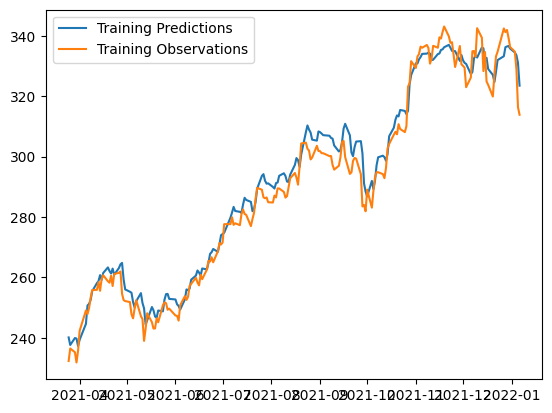

In [14]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

Menampilkan grafik training predictions dan training observations

1/1 [==============================] - 0s 31ms/step


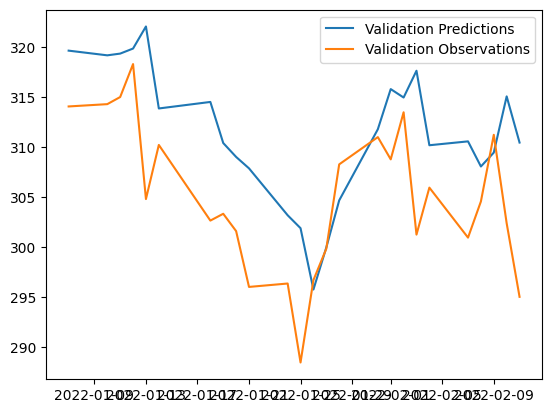

In [15]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

Menampilkan grafik validation predictions dan validation observations

1/1 [==============================] - 0s 29ms/step


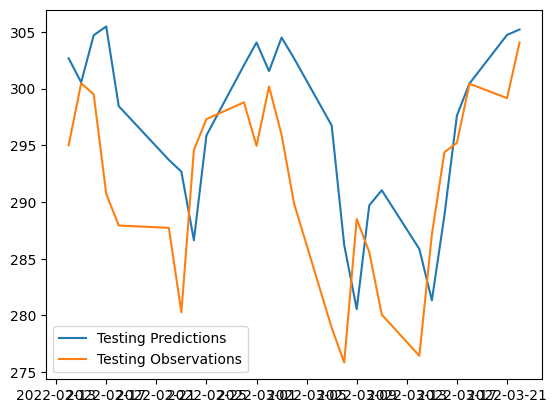

In [16]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

Menampilkan grafik testing predictions dan testing observations

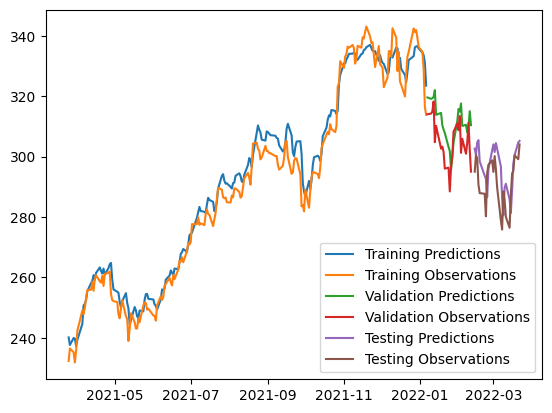

In [17]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

Menggabungkan semua grafik training, validation dan testing